# **Qualified Leads Classification**


# **Get our environment set up**


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from datetime import datetime 



In [2]:
from collections import Counter


In [3]:
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns
%matplotlib inline


# **Read The Dataset**

In [4]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [6]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.



## **Save a copy from the original data**

In [7]:
df_copy = df.copy()

# **Drop The Last Empty COls [  Unnamed: 11	 - Unnamed: 12	]**

In [8]:
df.drop("Unnamed: 11", axis=1, inplace=True)
df.drop("Unnamed: 12", axis=1, inplace=True)


In [9]:
df

,lead_id,customer_name,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
0,22,Rajaa M.Mousa,Orange,message: Idea about the best area in Sheik Za...,2022-03-07 12:56:20.523509,generic form,none,google,dev_-_sodic,sodic october plaza,0
1,30,Sahar Shalaby,Vodafone,ad_id : 23843176891470664 \nform_id : 36774549...,2019-09-16 13:17:18.459000,facebook,o west - fb_creme de la creme_ cairo/giza_27-60,facebook,orascom - lead generation,o west,0
2,42,Mohamed,Vodafone,message:,2022-05-07 02:03:53.589687,generic form,gouna_-_properties,google,locations,el gouna for sale & resale,0
3,44,Maher Elnakib,Orange,ad_id : 23844249544660664 \nadset_id : 2384424...,2019-12-19 22:56:46.662000,facebook,new release north edge general with north coas...,facebook,city edge - lead generation,north edge,0
4,48,pierre,Vodafone,message:,2022-01-27 05:56:22.806753,top compounds form,none,google,dev_-_inertia_egypt,joulz,0
...,...,...,...,...,...,...,...,...,...,...,...
91124,101024,Abadi Ahmeed,Gulf,ad_id : 23850279525690562 \nadgroup_id : 23850...,2022-06-06 10:42:19.756014,facebook,the lakes bloomfields - khaleeji lookalike - n...,facebook,tatweer misr - lead generation - cooing 2 - new,mostakbal city villa offer,0
91125,101025,Nermine Elassey,Orange,ad_id : 23850531682810398 \nadgroup_id : 23850...,2022-06-06 10:45:44.002419,facebook,telal sahel - no targeting - north coast,facebook,roya - lead generation - cooing 3 - new,telal sahel,0
91126,101026,mohamed sherif,Orange,message:,2022-06-06 10:51:46.991162,generic form,waterway_branded_residences,google,dev_-_equity,the waterway branded residences,0
91127,101027,Ahmed Monir Mostafa Hosny,Orange,ad_id : 23850616546710398 \nadgroup_id : 23850...,2022-06-06 10:52:25.310426,facebook,telal sahel - gouna lookalike - north coast,facebook,roya - lead generation - cooing 3 - new,telal sahel,0


# **Explore the dataset**

In [10]:
features = df.columns[:-1].tolist()
features

['lead_id',
 'customer_name',
 'lead_mobile_network',
 'message',
 'lead_time',
 'method_of_contact',
 'ad_group',
 'lead_source',
 'campaign',
 'location']

In [11]:
#Check the shape of the data
df.shape


(91129, 11)

In [12]:
##Info about the data shape of data, type of individual columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91129 entries, 0 to 91128
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   lead_id              91129 non-null  int64 
 1   customer_name        91129 non-null  object
 2   lead_mobile_network  91128 non-null  object
 3   message              89091 non-null  object
 4   lead_time            91129 non-null  object
 5   method_of_contact    91129 non-null  object
 6   ad_group             91057 non-null  object
 7   lead_source          91129 non-null  object
 8   campaign             90349 non-null  object
 9   location             90980 non-null  object
 10  low_qualified        91129 non-null  object
dtypes: int64(1), object(10)
memory usage: 7.6+ MB


In [13]:
#Check the data types
df.dtypes


lead_id                 int64
customer_name          object
lead_mobile_network    object
message                object
lead_time              object
method_of_contact      object
ad_group               object
lead_source            object
campaign               object
location               object
low_qualified          object
dtype: object

In [14]:
df.describe(include='all').T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
lead_id,91129.0,NaN,NaN,NaN,57588.002239,24631.285409,22.0,35871.0,58134.0,78400.0,101032.0
customer_name,91129,55232,Rubbish,847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_mobile_network,91128,10,Vodafone,39046,NaN,NaN,NaN,NaN,NaN,NaN,NaN
message,89091,73237,message:,6882,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,91129,90993,2019-09-02 00:00:00.000000,39,NaN,NaN,NaN,NaN,NaN,NaN,NaN
method_of_contact,91129,134,facebook,48649,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ad_group,91057,2480,none,39835,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lead_source,91129,125,facebook,51267,NaN,NaN,NaN,NaN,NaN,NaN,NaN
campaign,90349,761,none,21601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,90980,3146,none,12962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Check Missing Data**

In [15]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,message,campaign,location,ad_group,lead_mobile_network,lead_id,customer_name,lead_time,method_of_contact,lead_source,low_qualified
Total,2038.00000,780.00000,149.000000,72.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0
Percent,2.23639,0.85593,0.163504,0.079009,0.001097,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
df.isna().sum()


lead_id                   0
customer_name             0
lead_mobile_network       1
message                2038
lead_time                 0
method_of_contact         0
ad_group                 72
lead_source               0
campaign                780
location                149
low_qualified             0
dtype: int64

# Convert Categorical Features TO Numierics


Encode low_qualified

In [17]:
df.low_qualified = pd.to_numeric(df.low_qualified, errors='coerce')


In [18]:
df['low_qualified'] = df['low_qualified'].astype('Int64') # capital I


# Using Label Encoding TO Encode categorical Features

Another approach to encoding categorical values is to use a technique called label encoding. Label encoding is simply converting each value in a column to a number.

In [19]:
df["lead_mobile_network"].value_counts().to_frame()


,lead_mobile_network
Vodafone,39046
Orange,18071
Etisalat,16462
Gulf,12070
Others,2422
US_Canda,1149
Europe,1025
WE,881
?,1
hykjghk,1


In [20]:
df["lead_mobile_network"] = df["lead_mobile_network"].astype('category')
df["lead_mobile_network"]  = df["lead_mobile_network"] .cat.codes


In [21]:
df["method_of_contact"].value_counts().to_frame()


,method_of_contact
facebook,48649
generic form,9966
whatsapp,8444
phone,7877
top compounds form,5768
...,...
personal - abdel-azim,1
referral ghanima,1
cooing client,1
personal aly rafea,1


In [22]:
df["method_of_contact"] = df["method_of_contact"].astype('category')
df["method_of_contact"]  = df["method_of_contact"] .cat.codes


In [23]:
df["lead_source"].value_counts().to_frame()


,lead_source
facebook,51267
google,18095
website,5184
phone,2804
personal,1669
...,...
duckduckgo.com,1
management/referral (nada),1
ca.search.yahoo.com,1
realestatechamber-eg.com,1


In [24]:
df["lead_source"] = df["lead_source"].astype('category')
df["lead_source"]  = df["lead_source"] .cat.codes

In [25]:
df["campaign"].value_counts().to_frame()


,campaign
none,21601
(none),2784
google_cpc,2623
mountain view - lead generation - cooing 3,1586
emaar - lead generation - cooing 3,1431
...,...
sodic,1
al ahly sabbour - lead generation - cooing 1,1
cold call,1
"dev-orascom,dev_-_orascom",1


In [26]:
df["campaign"] = df["campaign"].astype('category')
df["campaign"]  = df["campaign"] .cat.codes

In [27]:
df["ad_group"].value_counts().to_frame()


,ad_group
none,39835
mountain view october - khaleeji lookalike 3%,995
mountain view october - general audience with investment/real estate interests,697
aura apartments - general audience real estate interests,550
the lakes bloomfields - khaleeji lookalike,473
...,...
zed west - new cairo & 6th of october lookalike,1
creek town - new cairo & 6th of october lookalike,1
october plaza - general audience with real estate interests,1
telal sokhna - frequent international travelers 25-34 cairo,1


In [28]:
df["ad_group"] = df["ad_group"].astype('category')
df["ad_group"]  = df["ad_group"] .cat.codes

In [40]:
df["location"].value_counts().to_frame()


,location
none,12962
marassi,3402
mountain view october apartments,2521
badya,1836
palm hills new cairo,1829
...,...
sidi abdelrahman or alamein,1
the quayside - chalet typical,1
the quayside - chalet ground,1
https://www.cooingestate.com/?utm_campaign=&utm_adgroup=&wbraid=cjokcajw_o-hbhazeioal0b6u6ohqior07i2j9vw2q574nsz1qscaywopdzpmv2wti5azcsorrgaah2f,1


In [41]:
df["location"] = df["location"].astype('category')
df["location"]  = df["location"] .cat.codes

In [42]:
df.dtypes

lead_id                         int64
customer_name                  object
Month                           Int64
lead_mobile_network              int8
message                        object
lead_time              datetime64[ns]
method_of_contact               int16
ad_group                        int16
lead_source                      int8
campaign                        int16
location                        int16
low_qualified                   Int64
dtype: object

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
lead_id,91129.0,57588.002239,24631.285409,22.0,35871.0,58134.0,78400.0,101032.0
Month,91121.0,6.057100,3.271887,1.0,3.0,5.0,9.0,12.0
lead_mobile_network,91129.0,4.678950,2.330446,-1.0,3.0,4.0,7.0,9.0
method_of_contact,91129.0,60.947185,35.591822,0.0,36.0,36.0,99.0,133.0
ad_group,91129.0,1376.877536,554.443988,-1.0,1163.0,1537.0,1537.0,2479.0
lead_source,91129.0,42.271889,26.416145,0.0,30.0,30.0,35.0,124.0
campaign,91129.0,424.281140,202.269129,-1.0,286.0,507.0,549.0,760.0
location,91129.0,1588.430159,829.458822,-1.0,943.0,1703.0,2098.0,3145.0
low_qualified,91121.0,0.175426,0.380333,0.0,0.0,0.0,0.0,1.0


# Extract date form dat

In [34]:

df['lead_time'] = pd.to_datetime(df['lead_time'], errors='coerce')


In [35]:
#df.insert(5,"Day", df.lead_time.dt.day)
df.insert(2, "Month", df.lead_time.dt.month)


In [36]:
#df['Day'] = df['Day'].astype('Int64')
df['Month'] = df['Month'].astype('Int64')


In [37]:
df

,lead_id,customer_name,Month,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
0,22,Rajaa M.Mousa,3,4,message: Idea about the best area in Sheik Za...,2022-03-07 12:56:20.523509,50,1537,35,229,sodic october plaza,0
1,30,Sahar Shalaby,9,7,ad_id : 23843176891470664 \nform_id : 36774549...,2019-09-16 13:17:18.459000,36,1567,30,570,o west,0
2,42,Mohamed,5,7,message:,2022-05-07 02:03:53.589687,50,823,35,435,el gouna for sale & resale,0
3,44,Maher Elnakib,12,4,ad_id : 23844249544660664 \nadset_id : 2384424...,2019-12-19 22:56:46.662000,36,1526,30,94,north edge,0
4,48,pierre,1,7,message:,2022-01-27 05:56:22.806753,118,1537,35,183,joulz,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91124,101024,Abadi Ahmeed,6,3,ad_id : 23850279525690562 \nadgroup_id : 23850...,2022-06-06 10:42:19.756014,36,2179,30,714,mostakbal city villa offer,0
91125,101025,Nermine Elassey,6,4,ad_id : 23850531682810398 \nadgroup_id : 23850...,2022-06-06 10:45:44.002419,36,2039,30,642,telal sahel,0
91126,101026,mohamed sherif,6,4,message:,2022-06-06 10:51:46.991162,50,2340,35,176,the waterway branded residences,0
91127,101027,Ahmed Monir Mostafa Hosny,6,4,ad_id : 23850616546710398 \nadgroup_id : 23850...,2022-06-06 10:52:25.310426,36,2036,30,642,telal sahel,0


In [44]:
cleaned_df = df[['lead_id', 'Month', 'lead_mobile_network', 'method_of_contact', 'lead_source', 'ad_group', 'campaign','location','low_qualified']]
cleaned_df

,lead_id,Month,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign,location,low_qualified
0,22,3,4,50,35,1537,229,2399,0
1,30,9,7,36,30,1567,570,1915,0
2,42,5,7,50,35,823,435,717,0
3,44,12,4,36,30,1526,94,1904,0
4,48,1,7,118,35,1537,183,1254,0
...,...,...,...,...,...,...,...,...,...
91124,101024,6,3,36,30,2179,714,1617,0
91125,101025,6,4,36,30,2039,642,2535,0
91126,101026,6,4,50,35,2340,176,2698,0
91127,101027,6,4,36,30,2036,642,2535,0


In [45]:
total = cleaned_df.isnull().sum().sort_values(ascending = False)
percent = (cleaned_df.isnull().sum()/cleaned_df.isnull().count()).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,Month,low_qualified,lead_id,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign,location
Total,8.000000,8.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.000088,0.000088,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **Empute Missing Vlaues**

In [48]:
cleaned_df = cleaned_df.fillna(0).astype(np.int64, errors='ignore')


In [49]:
missing_col = ['Month','low_qualified']
#Technique 1: Using mean to impute the missing values
for i in missing_col:
 cleaned_df.loc[cleaned_df.loc[:,i].isnull(),i]=cleaned_df.loc[:,i].mean()

In [50]:
total = cleaned_df.isnull().sum().sort_values(ascending = False)
percent = (cleaned_df.isnull().sum()/cleaned_df.isnull().count()).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

,lead_id,Month,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign,location,low_qualified
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
cleaned_df.isna().sum()


lead_id                0
Month                  0
lead_mobile_network    0
method_of_contact      0
lead_source            0
ad_group               0
campaign               0
location               0
low_qualified          0
dtype: int64

In [52]:
cleaned_df.dtypes

lead_id                  int64
Month                  float64
lead_mobile_network      int64
method_of_contact        int64
lead_source              int64
ad_group                 int64
campaign                 int64
location                 int64
low_qualified          float64
dtype: object

In [53]:
cleaned_df['Month'] = cleaned_df['Month'].astype('Int64')
cleaned_df['low_qualified'] = cleaned_df['low_qualified'].astype('Int64')


In [54]:
cleaned_df.dtypes

lead_id                int64
Month                  Int64
lead_mobile_network    int64
method_of_contact      int64
lead_source            int64
ad_group               int64
campaign               int64
location               int64
low_qualified          Int64
dtype: object

# separate the qualified_leads and low_qualified_leads to look into differences between them.

In [55]:
qualified_leads=df[cleaned_df.low_qualified==0]
qualified_leads

,lead_id,customer_name,Month,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
0,22,Rajaa M.Mousa,3,4,message: Idea about the best area in Sheik Za...,2022-03-07 12:56:20.523509,50,1537,35,229,2399,0
1,30,Sahar Shalaby,9,7,ad_id : 23843176891470664 \nform_id : 36774549...,2019-09-16 13:17:18.459000,36,1567,30,570,1915,0
2,42,Mohamed,5,7,message:,2022-05-07 02:03:53.589687,50,823,35,435,717,0
3,44,Maher Elnakib,12,4,ad_id : 23844249544660664 \nadset_id : 2384424...,2019-12-19 22:56:46.662000,36,1526,30,94,1904,0
4,48,pierre,1,7,message:,2022-01-27 05:56:22.806753,118,1537,35,183,1254,0
...,...,...,...,...,...,...,...,...,...,...,...,...
91124,101024,Abadi Ahmeed,6,3,ad_id : 23850279525690562 \nadgroup_id : 23850...,2022-06-06 10:42:19.756014,36,2179,30,714,1617,0
91125,101025,Nermine Elassey,6,4,ad_id : 23850531682810398 \nadgroup_id : 23850...,2022-06-06 10:45:44.002419,36,2039,30,642,2535,0
91126,101026,mohamed sherif,6,4,message:,2022-06-06 10:51:46.991162,50,2340,35,176,2698,0
91127,101027,Ahmed Monir Mostafa Hosny,6,4,ad_id : 23850616546710398 \nadgroup_id : 23850...,2022-06-06 10:52:25.310426,36,2036,30,642,2535,0


In [56]:
qualified_leads=cleaned_df[cleaned_df.low_qualified==0]
qualified_leads

,lead_id,Month,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign,location,low_qualified
0,22,3,4,50,35,1537,229,2399,0
1,30,9,7,36,30,1567,570,1915,0
2,42,5,7,50,35,823,435,717,0
3,44,12,4,36,30,1526,94,1904,0
4,48,1,7,118,35,1537,183,1254,0
...,...,...,...,...,...,...,...,...,...
91124,101024,6,3,36,30,2179,714,1617,0
91125,101025,6,4,36,30,2039,642,2535,0
91126,101026,6,4,50,35,2340,176,2698,0
91127,101027,6,4,36,30,2036,642,2535,0


In [57]:
low_qualified_leads=df[cleaned_df.low_qualified==1]
low_qualified_leads

,lead_id,customer_name,Month,lead_mobile_network,message,lead_time,method_of_contact,ad_group,lead_source,campaign,location,low_qualified
7,70,Gaber youssef,10,7,location : https://old.nawy.com/prime-compound...,2021-10-03 21:58:29.602753,50,1537,35,229,2407,1
110,995,نهي الكفافي,3,7,message:,2022-03-13 23:48:05.343299,127,1537,117,655,1466,1
111,998,Unknown,12,7,Called at 6:09 but did not receive the call on...,2021-12-05 16:09:05.114939,99,1537,87,549,1884,1
112,998,Unknown,12,7,Called at 6:09 but did not receive the call on...,2021-12-05 16:19:38.698440,99,1537,87,549,1884,1
113,998,Unknown,12,7,"Called back now , no answer",2021-12-05 18:38:38.135197,99,1537,87,549,1884,1
...,...,...,...,...,...,...,...,...,...,...,...,...
90963,100835,Mohamed Moussa,6,7,ad_id : 23850293639620664 \nadgroup_id : 23850...,2022-06-05 16:34:41.624628,36,2182,30,713,1617,1
90981,100856,Rubbish,6,5,"Ended the call when I answered, tried to call ...",2022-06-05 18:22:18.446796,99,1537,87,549,1884,1
91017,100898,Rubbish,6,7,"Called out of working hours, called back twice...",2022-06-05 21:23:17.394212,99,1537,87,549,1884,1
91045,100933,Ahmed Pilot,6,7,ad_id : 23850671238270398 \nadgroup_id : 23850...,2022-06-05 23:49:17.972762,36,188,30,448,299,1


In [58]:
low_qualified_leads=cleaned_df[cleaned_df.low_qualified==1]
low_qualified_leads

,lead_id,Month,lead_mobile_network,method_of_contact,lead_source,ad_group,campaign,location,low_qualified
7,70,10,7,50,35,1537,229,2407,1
110,995,3,7,127,117,1537,655,1466,1
111,998,12,7,99,87,1537,549,1884,1
112,998,12,7,99,87,1537,549,1884,1
113,998,12,7,99,87,1537,549,1884,1
...,...,...,...,...,...,...,...,...,...
90963,100835,6,7,36,30,2182,713,1617,1
90981,100856,6,5,99,87,1537,549,1884,1
91017,100898,6,7,99,87,1537,549,1884,1
91045,100933,6,7,36,30,188,448,299,1


## **Drop Duplicates**

In [64]:
cleaned_df.duplicated().value_counts()


False    87063
dtype: int64

In [65]:
cleaned_df[cleaned_df.low_qualified==0].duplicated().value_counts()


False    72529
dtype: int64

In [66]:
cleaned_df[cleaned_df.low_qualified==1].duplicated().value_counts()


False    14534
dtype: int64

In [67]:
cleaned_df.drop_duplicates(inplace=True)


In [68]:
cleaned_df.duplicated().value_counts()


False    87063
dtype: int64

# **Handling Outliers**

In [69]:
# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
# seed the random number generator
seed(1)
# generate univariate observations
data =cleaned_df["low_qualified"]
# calculate interquartile range
q25, q75 = percentile(data, 25), percentile(data, 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
# calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
# identify outliers
outliers = [x for x in data if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
# remove outliers
outliers_removed = [x for x in data if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 14534
Non-outlier observations: 72529


# **Data Unbalance**

Let's check data unbalance with respect with target value, i.e. low_qualified.



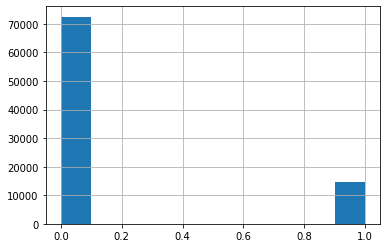

In [70]:
cleaned_df['low_qualified'].hist()

In [71]:
cleaned_df['low_qualified'].value_counts(normalize=True)


0    0.833063
1    0.166937
Name: low_qualified, dtype: Float64

## **Data exploration**

Qualified Leads VS Time

In [72]:
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import missingno as msno


In [73]:
cleaned_df['low_qualified'].isnull().values.any()


False

Find the Distribution for each col VS Qualified Leads

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

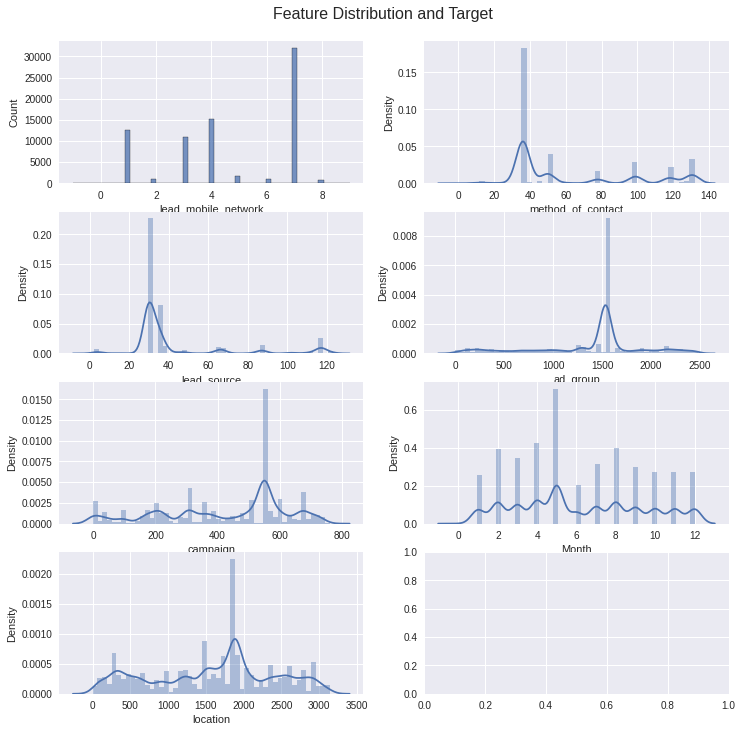

In [75]:
plt.style.use('seaborn')

# create subplot contain 6 plots (2 plot for 3 rows)
fig, ax = plt.subplots(4,2, figsize=(12,12))

# set title for figure
fig.suptitle('Feature Distribution and Target', fontsize=16, y=0.92)

# draw histogram for feature and  best fit line.
sns.histplot(qualified_leads.lead_mobile_network, ax=ax[0][0])
sns.distplot(qualified_leads.method_of_contact, ax=ax[0][1])
sns.distplot(qualified_leads.lead_source, ax=ax[1][0])
sns.distplot(qualified_leads.ad_group, ax=ax[1][1])
sns.distplot(qualified_leads.campaign, ax=ax[2][0])
sns.distplot(qualified_leads.Month, ax=ax[2][1])
sns.distplot(qualified_leads.location, ax=ax[3][0])
plt.show()

Find the Distribution network VS low qulified leads

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

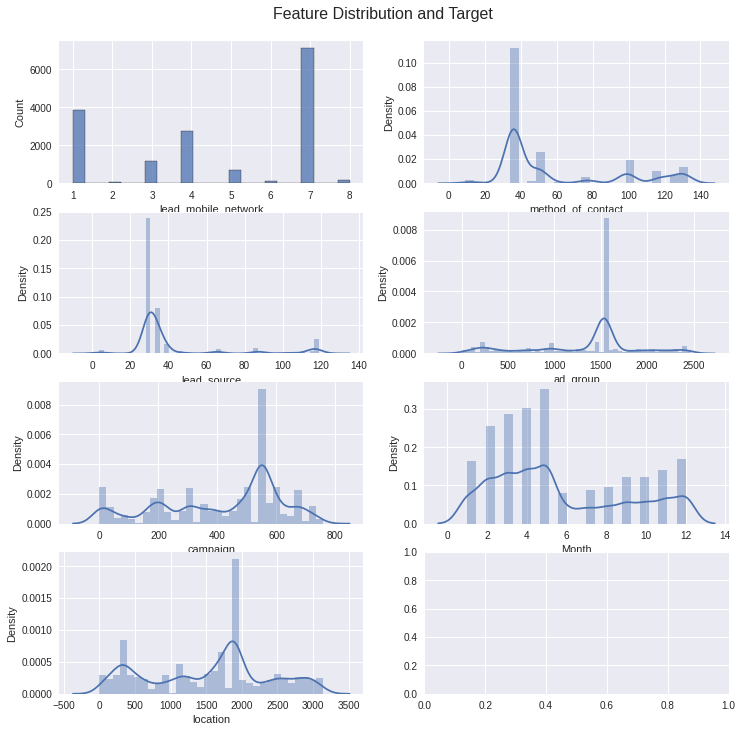

In [74]:
plt.style.use('seaborn')

# create subplot contain 6 plots (2 plot for 3 rows)
fig, ax = plt.subplots(4,2, figsize=(12,12))

# set title for figure
fig.suptitle('Feature Distribution and Target', fontsize=16, y=0.92)

# draw histogram for feature and  best fit line.
sns.histplot(low_qualified_leads.lead_mobile_network, ax=ax[0][0])
sns.distplot(low_qualified_leads.method_of_contact, ax=ax[0][1])
sns.distplot(low_qualified_leads.lead_source, ax=ax[1][0])
sns.distplot(low_qualified_leads.ad_group, ax=ax[1][1])
sns.distplot(low_qualified_leads.campaign, ax=ax[2][0])
sns.distplot(low_qualified_leads.Month, ax=ax[2][1])
sns.distplot(low_qualified_leads.location, ax=ax[3][0])
plt.show()

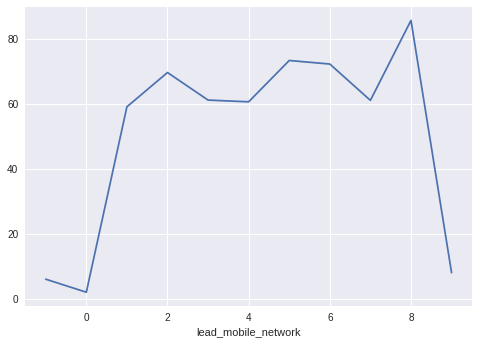

In [85]:
qualified_leads.groupby('lead_mobile_network').mean()['method_of_contact'].plot()

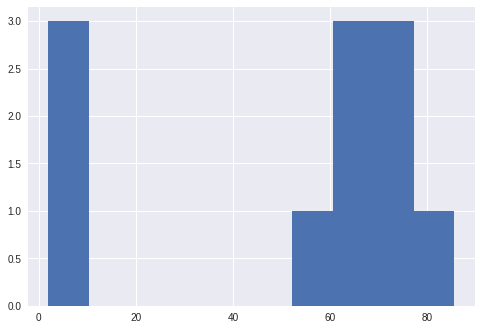

In [83]:
qualified_leads.groupby('lead_mobile_network').mean()['method_of_contact'].hist()


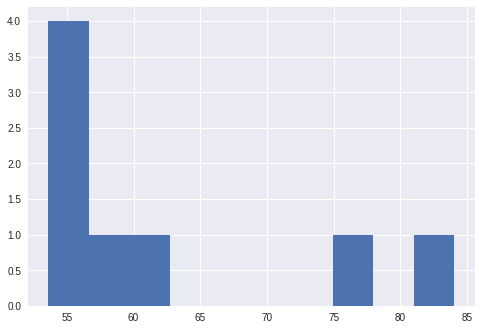

In [84]:
low_qualified_leads.groupby('lead_mobile_network').mean()['method_of_contact'].hist()


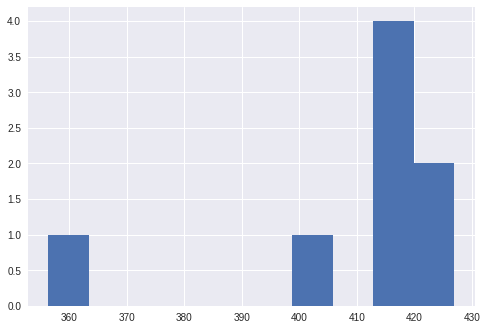

In [86]:
low_qualified_leads.groupby('lead_mobile_network').mean()['campaign'].hist()


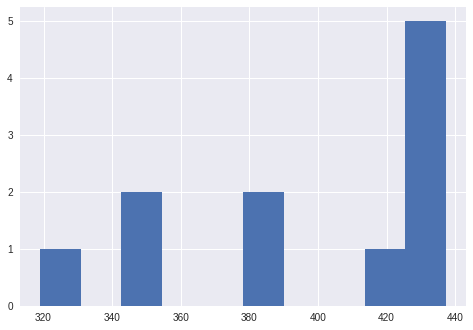

In [88]:
qualified_leads.groupby('lead_mobile_network').mean()['campaign'].hist()


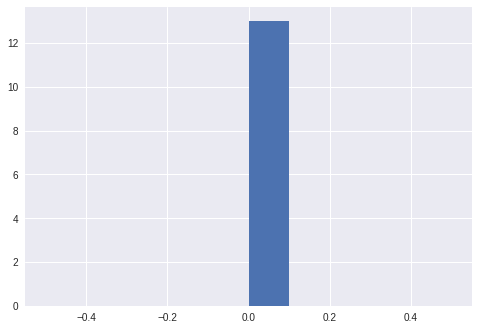

In [90]:
qualified_leads.groupby('Month').mean()['low_qualified'].hist()


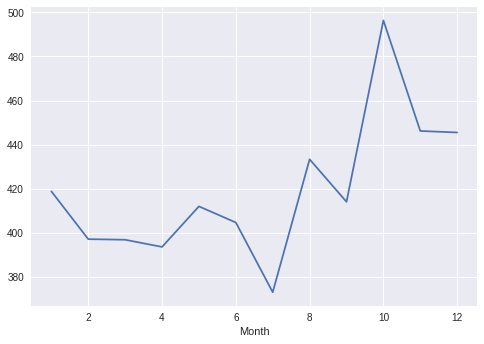

In [95]:
low_qualified_leads.groupby('Month').mean()['campaign'].plot()


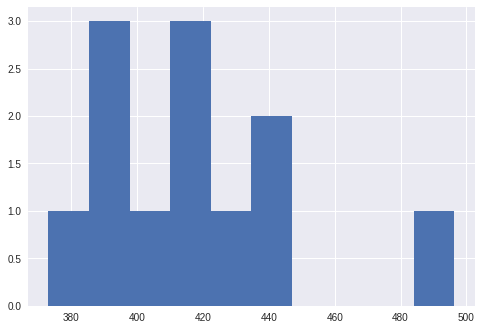

In [98]:
low_qualified_leads.groupby('Month').mean()['campaign'].hist()


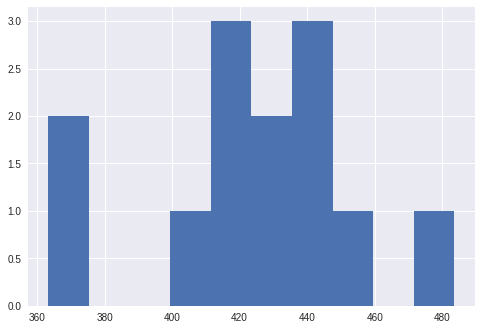

In [99]:
qualified_leads.groupby('Month').mean()['campaign'].hist()

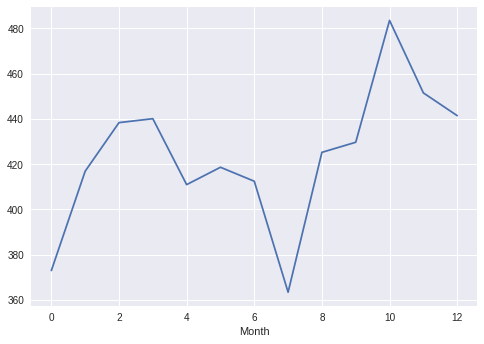

In [96]:
qualified_leads.groupby('Month').mean()['campaign'].plot()


## Let's go ahead an look at the distribution of the different features of this dataset.

In [101]:
cols = cleaned_df.columns
cols

Index(['lead_id', 'Month', 'lead_mobile_network', 'method_of_contact',
       'lead_source', 'ad_group', 'campaign', 'location', 'low_qualified'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



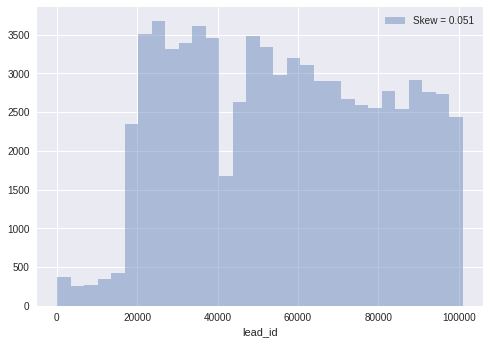

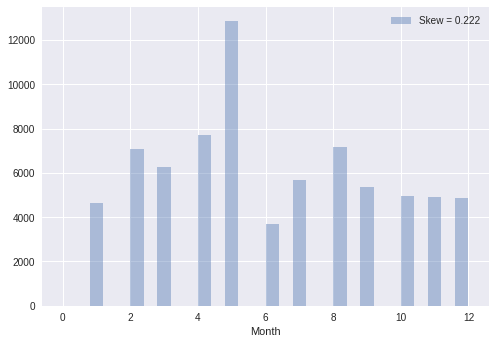

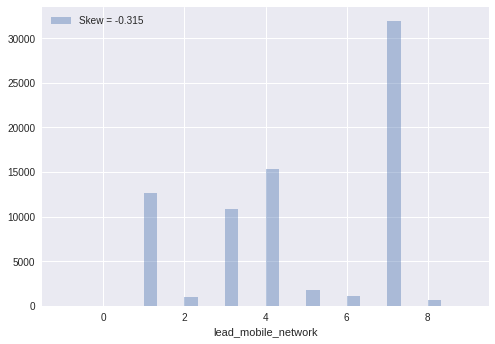

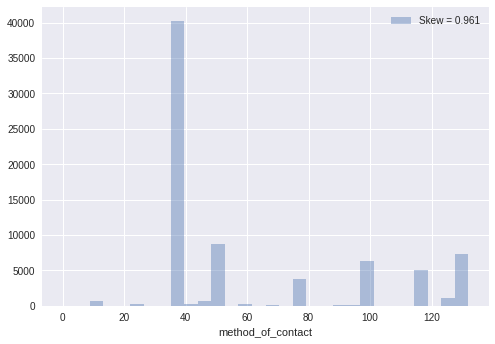

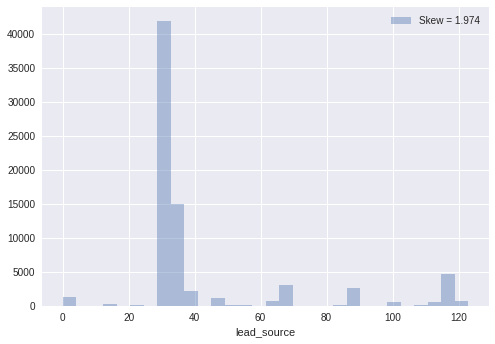

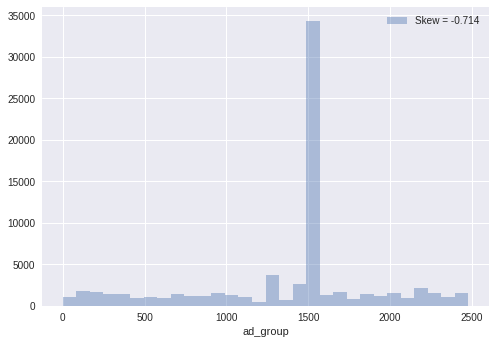

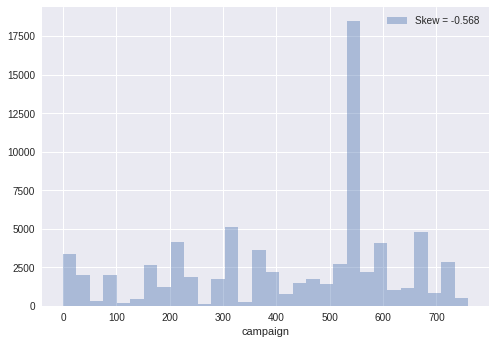

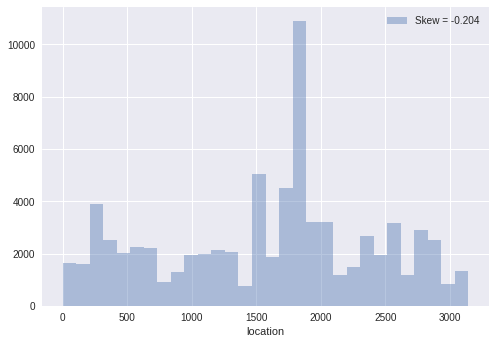

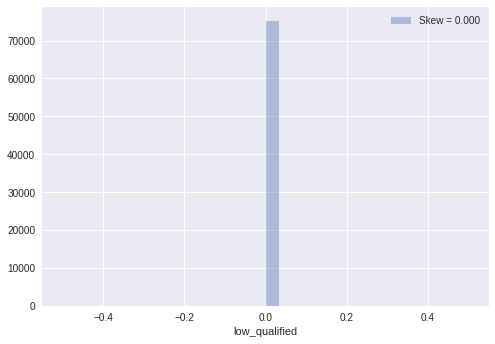

In [105]:
for feat in cols:
    skew = qualified_leads[feat].skew()
    sns.distplot(qualified_leads[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



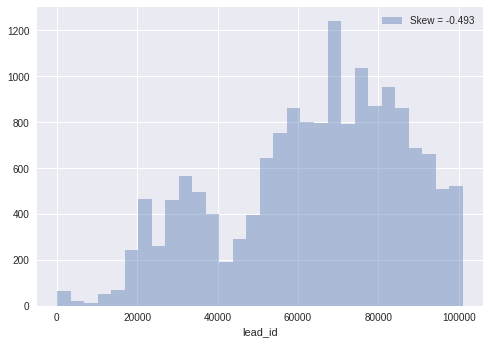

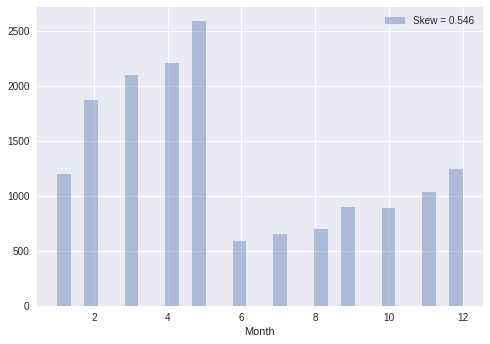

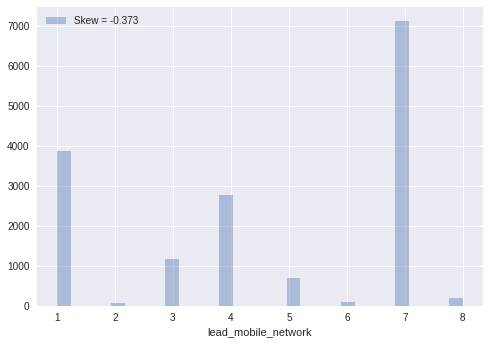

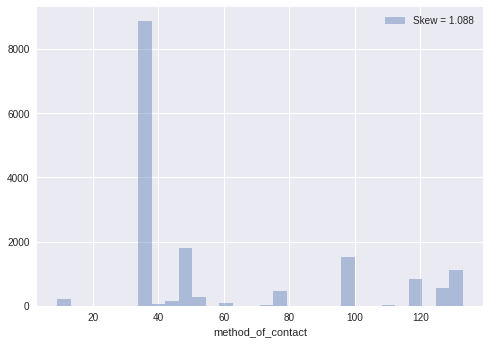

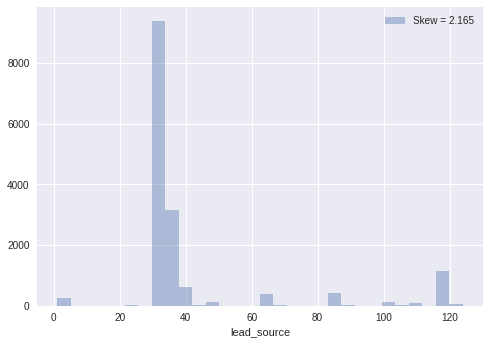

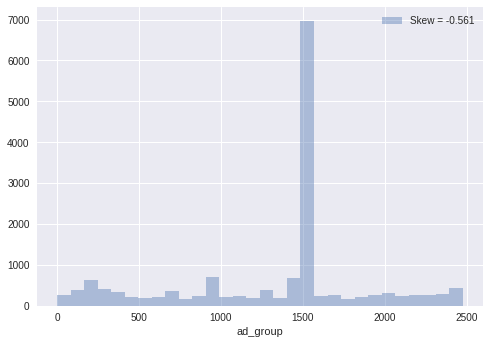

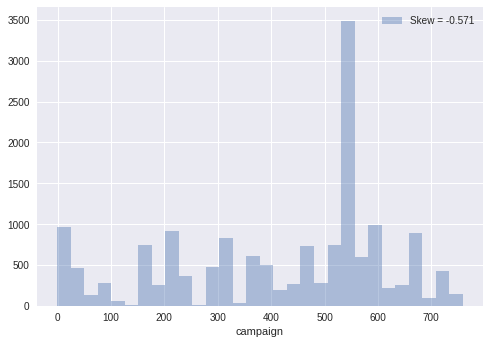

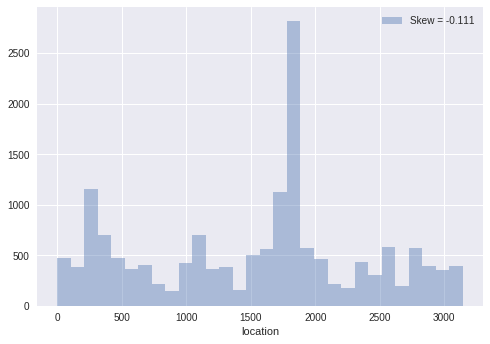

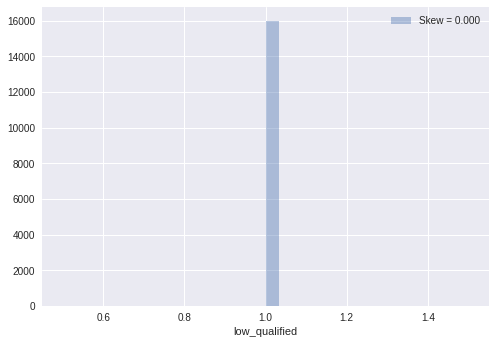

In [104]:
for feat in cols:
    skew = low_qualified_leads[feat].skew()
    sns.distplot(low_qualified_leads[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

## Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

In [108]:
df1Corr=pd.DataFrame(cleaned_df.corr().unstack().sort_values(ascending=False)['low_qualified'],
                     columns=['Correlation to the target'])
df1Corr

,Correlation to the target
low_qualified,1.000000
lead_id,0.115263
lead_mobile_network,-0.000830
campaign,-0.008152
location,-0.030812
lead_source,-0.040200
method_of_contact,-0.042372
ad_group,-0.042945
Month,-0.052314


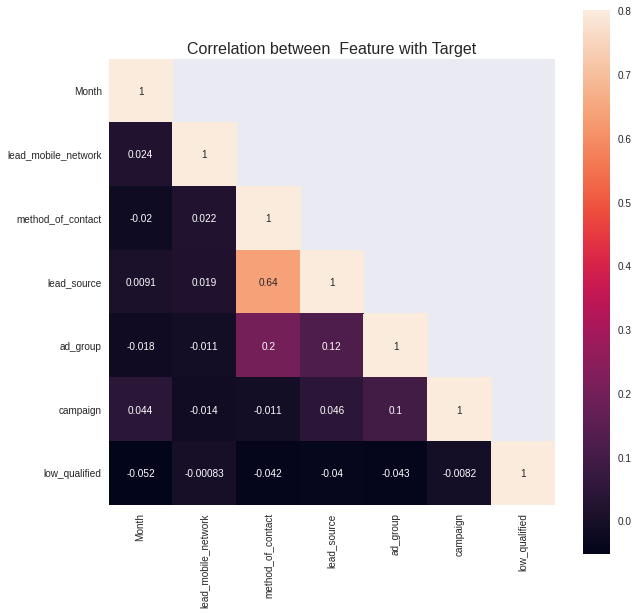

In [110]:
# list of continuous feature
columns =[ 'Month',  'lead_mobile_network', 'method_of_contact',
       'lead_source', 'ad_group', 'campaign', 'low_qualified']
# calculate correlation matrix.
corrMatt = cleaned_df[columns].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
g = sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True, )
g.set_title("Correlation between  Feature with Target", fontsize=16, y=1.05)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



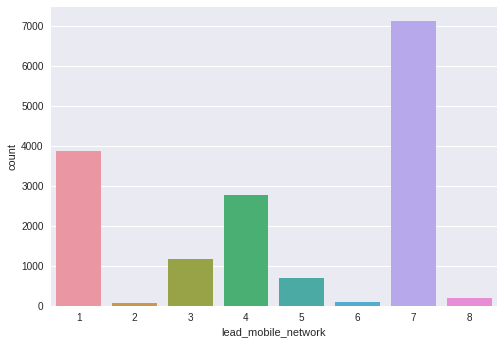

In [113]:
sns.countplot(low_qualified_leads['lead_mobile_network'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



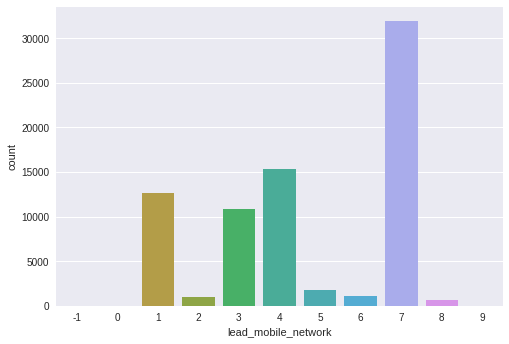

In [114]:
sns.countplot(qualified_leads['lead_mobile_network'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



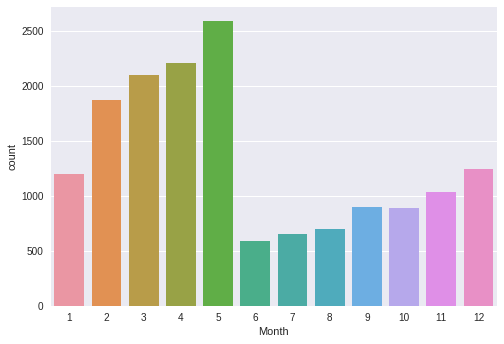

In [117]:
sns.countplot(low_qualified_leads['Month'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



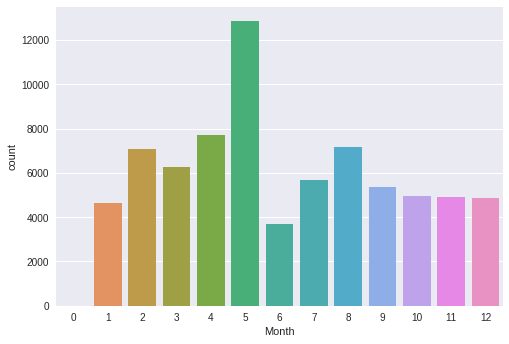

In [118]:
sns.countplot(qualified_leads['Month'])
plt.show()

# Split data in train, test and validation set¶

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [121]:

# Remove 'id' and 'target' columns
labels = cleaned_df.columns[:-1]

X = cleaned_df[labels]
y = cleaned_df['low_qualified']
y=y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)



In [122]:
labels = cleaned_df.columns[:-1]


In [123]:
labels

Index(['lead_id', 'Month', 'lead_mobile_network', 'method_of_contact',
       'lead_source', 'ad_group', 'campaign', 'location'],
      dtype='object')

In [124]:
print(len(y_train[y_train == 1])/len(y_train))
print(len(y_test[y_test == 1])/len(y_test))

0.16779612347451545
0.16349853557686786


## **No under or oversampling**

First, we need a baseline metric with a simple logistic regression trained on the original unbalanced data.

Since we want to avoid false negatives (frauds that go undetected), recall is what we should to look at.

In [125]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [126]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



              precision    recall  f1-score   support

           0       0.84      1.00      0.91     14566
           1       0.00      0.00      0.00      2847

    accuracy                           0.84     17413
   macro avg       0.42      0.50      0.46     17413
weighted avg       0.70      0.84      0.76     17413



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



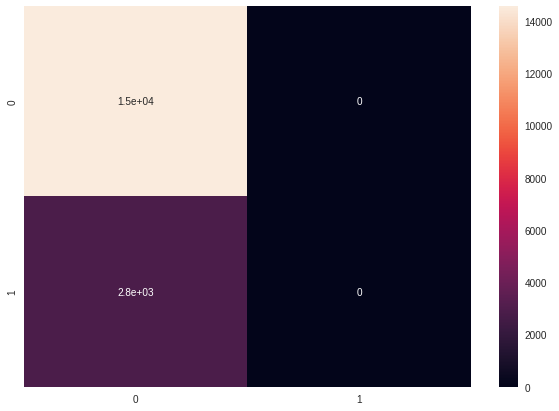

In [127]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

print(classification_report(y_test,y_pred))

In [128]:
clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     14566
           1       0.31      0.19      0.24      2847

    accuracy                           0.80     17413
   macro avg       0.58      0.55      0.56     17413
weighted avg       0.76      0.80      0.78     17413



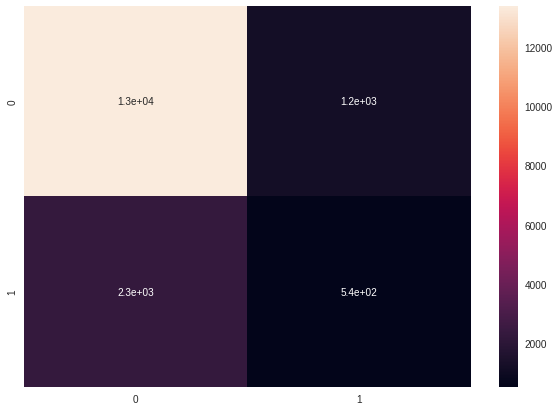

In [129]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

print(classification_report(y_test,y_pred))

We see that without under or over sampling, we achieve a mere 85% recall on the test set with logistic regression. As expected, random forest classifier works better than logistic regression even without hyperparameter tuning due to its ensemble nature.

## **Undersampling**

Here we will undersample the majority class  without replacement to match the number of the minority class

In [130]:
from sklearn.utils import resample

X_train_qualified = X_train[y_train == 0]
y_train_qualified = y_train[y_train == 0]
X_train_low_qualified = X_train[y_train == 1]
y_train_low_qualified = y_train[y_train == 1]

X_train_qualified, y_train_qualified = resample(X_train_qualified, y_train_qualified, n_samples = len(y_train_low_qualified), replace = False, random_state = 333)

X_train_undersample = pd.concat([X_train_qualified, X_train_low_qualified], ignore_index=True)
y_train_undersample = pd.concat([y_train_qualified, y_train_low_qualified], ignore_index=True)

In [131]:
print(type(y_train_undersample))
print(y_train_undersample.value_counts())
print(len(X_train_undersample))

<class 'pandas.core.series.Series'>
0    11687
1    11687
Name: low_qualified, dtype: int64
23374


In [132]:
clf = LogisticRegression()
clf.fit(X_train_undersample, y_train_undersample)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.88      0.54      0.67     14566
           1       0.21      0.61      0.31      2847

    accuracy                           0.55     17413
   macro avg       0.54      0.58      0.49     17413
weighted avg       0.77      0.55      0.61     17413



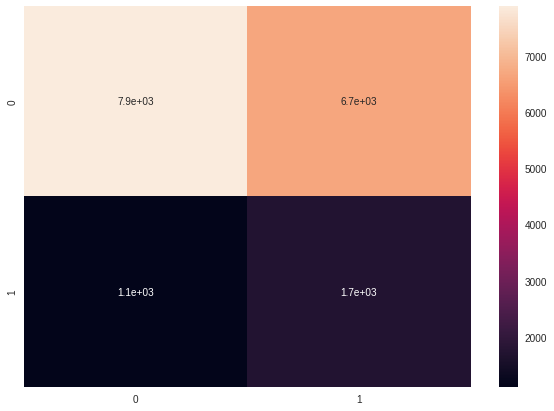

In [133]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

print(classification_report(y_test,y_pred))

In [134]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train_undersample, y_train_undersample)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.89      0.63      0.74     14566
           1       0.24      0.59      0.34      2847

    accuracy                           0.62     17413
   macro avg       0.56      0.61      0.54     17413
weighted avg       0.78      0.62      0.67     17413



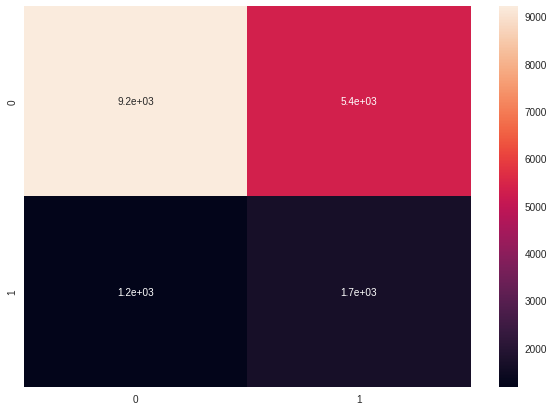

In [135]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

print(classification_report(y_test,y_pred))

## **Oversampling**

Here we will oversample the minority class  with replacement to match the number of the majority class .



In [136]:
X_train_qualified = X_train[y_train == 0]
y_train_qualified = y_train[y_train == 0]
X_train_low_qualified = X_train[y_train == 1]
y_train_low_qualified = y_train[y_train == 1]

X_train_low_qualified, y_train_low_qualified = resample(X_train_low_qualified, y_train_low_qualified, n_samples = len(y_train_qualified), replace = True, random_state = 333)

X_train_oversample = pd.concat([X_train_qualified, X_train_low_qualified], ignore_index=True)
y_train_oversample = pd.concat([y_train_qualified, y_train_low_qualified], ignore_index=True)

In [137]:
print(y_train_oversample.value_counts())
print(len(X_train_oversample))

0    57963
1    57963
Name: low_qualified, dtype: int64
115926


In [138]:
clf = LogisticRegression()
clf.fit(X_train_oversample, y_train_oversample)
y_pred = clf.predict(X_test)

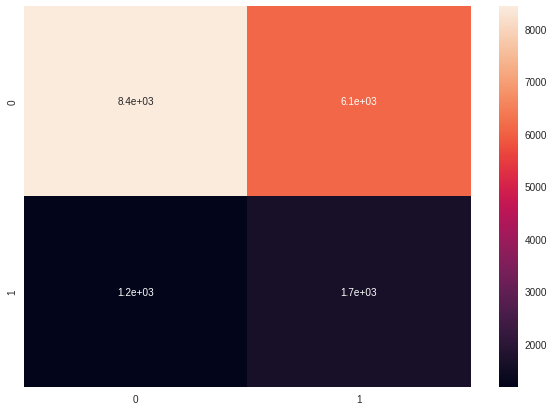

In [139]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)


In [140]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.88      0.58      0.70     14566
           1       0.21      0.58      0.31      2847

    accuracy                           0.58     17413
   macro avg       0.55      0.58      0.51     17413
weighted avg       0.77      0.58      0.63     17413



In [141]:
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train_oversample, y_train_oversample)
y_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87     14566
           1       0.30      0.26      0.28      2847

    accuracy                           0.78     17413
   macro avg       0.58      0.57      0.57     17413
weighted avg       0.77      0.78      0.77     17413



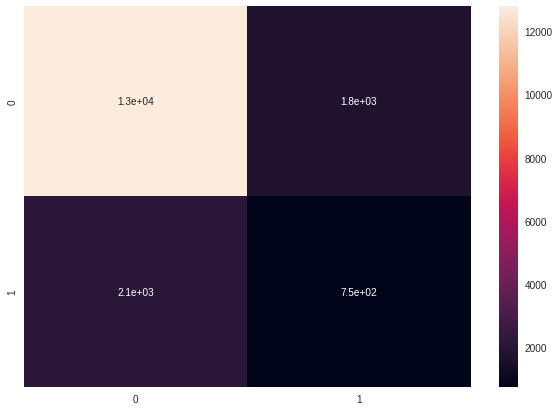

In [142]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

print(classification_report(y_test,y_pred))